In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def apply_f(a, f):
    if isinstance(a, list):
        return list(map(lambda t: apply_f(t, f), a))
    else:
        return f(a)


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1), dtype=float)
    b = (w[0])[0]
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    isinstance(b, float) or isinstance(b, int)
    return w, b


def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid((np.dot(np.transpose(w), X)) + b)
    cost = -np.sum(np.multiply(Y, np.log(A)) + np.multiply((1 - Y), np.log(1 - A))) / m

    dw = (np.dot(X, np.transpose(A - Y))) / m
    db = np.sum(A - Y) / m

    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    cost = np.squeeze(cost)
    assert (cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    global dw, db
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(np.transpose(w), X) + b)

    for i in range(A.shape[1]):

        if A[0][i] <= 0.5:
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1

    assert (Y_prediction.shape == (1, m))

    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(np.shape(X_train)[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d



In [ ]:
def test_dataset():
    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
    index = 30
    plt.imshow(train_set_x_orig[index])
    print("y = " + str(train_set_y[:, index]) + ", it is class '" +
          classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' images.")



def learn_net():
    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    train_set_x = train_set_x_flatten / 255.
    test_set_x = test_set_x_flatten / 255.

    d = model(train_set_x, train_set_y, test_set_x, test_set_y,
                  num_iterations=2000, learning_rate=0.005, print_cost=True)

    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('Error')
    plt.xlabel('Number of learn iteration')
    plt.title("Speed learn =" + str(d["learning_rate"]))
    plt.show()


def graph_learn_net():
    learning_rates = [0.01, 0.001, 0.0001]
    models = {}

    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    train_set_x = train_set_x_flatten / 255.
    test_set_x = test_set_x_flatten / 255.

    for i in learning_rates:
        print("learning rate is: " + str(i))
        models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500,
                                   learning_rate=i,
                                   print_cost=False)
        print('\n' + "-------------------------------------------------------" + '\n')

    for i in learning_rates:
        plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

    plt.ylabel('Error')
    plt.xlabel('Number of learn iteration')

    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()


from skimage import transform
from skimage.io import imread


def user_check_image(path):
    image = np.array(imread(path))
    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    train_set_x = train_set_x_flatten / 255.
    test_set_x = test_set_x_flatten / 255.

    d = model(train_set_x, train_set_y, test_set_x, test_set_y,
                  num_iterations=2000, learning_rate=0.005, print_cost=True)
    num_px = train_set_x_orig.shape[1]
    num_py = train_set_x_orig.shape[2]

    image = image / 255.
    image = transform.resize(image, [num_py, num_px, 3])
    my_image = image.reshape((1, num_py * num_px * 3)).T

    my_predicted_image = predict(d["w"], d["b"], my_image)

    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", neural network prediction: \"" + classes[
        int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" on the image.")


y = [0], it is class 'non-cat' images.


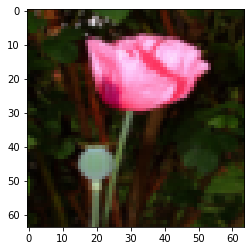

In [7]:
test_dataset()

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


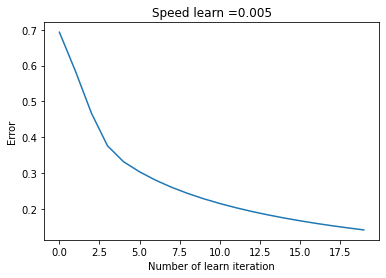

In [8]:
learn_net()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



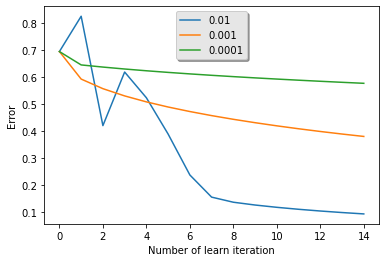

In [9]:
graph_learn_net()

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
y = 1.0, neural network prediction: "cat" on the image.


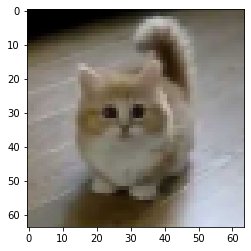

In [11]:
user_check_image('images/my_image_cat.jpg')